This assignment provides an opportunity to build an ANN model using the a bank marketing dataset

https://www.kaggle.com/sriharipramod/bank-loan-classification

Target variable - personal loan - reflects whether a customer accepted a personal loan offer.

Load the data and perform EDA.

1. Evaluate missing values.
2. Assess target class distribution.
3. Pre-process data as needed.
4. Assess information value of individual features (correlation analysis and pairlot).

5 pts.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns


In [ ]:
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving UniversalBank.csv to UniversalBank (1).csv


In [ ]:
# Load data
df = pd.read_csv('UniversalBank.csv')

In [ ]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:
# Evaluate missing values
print(df.isnull().sum())

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [ ]:
# Assess target class distribution
print(df['Personal Loan'].value_counts(normalize=True))

0    0.904
1    0.096
Name: Personal Loan, dtype: float64


In [ ]:
# Pre-process data as needed
df = df.drop(['ID', 'ZIP Code'], axis=1)

In [ ]:
# convert 'Education' variable to categorical
df['Education'] = df['Education'].astype('category')

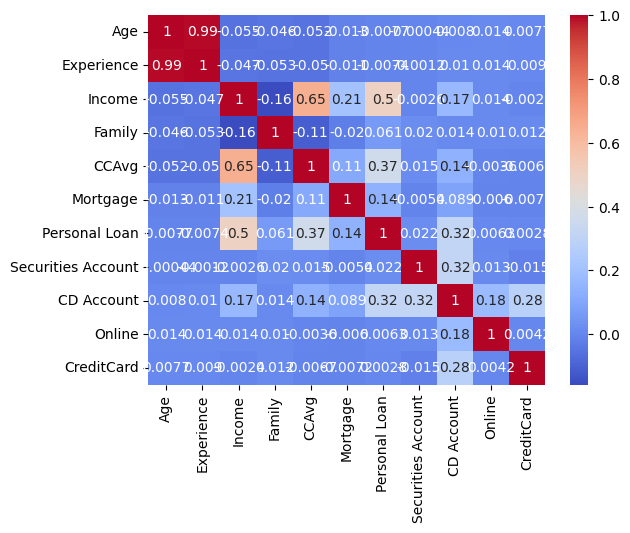

In [ ]:
# Assess the information value of individual features
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

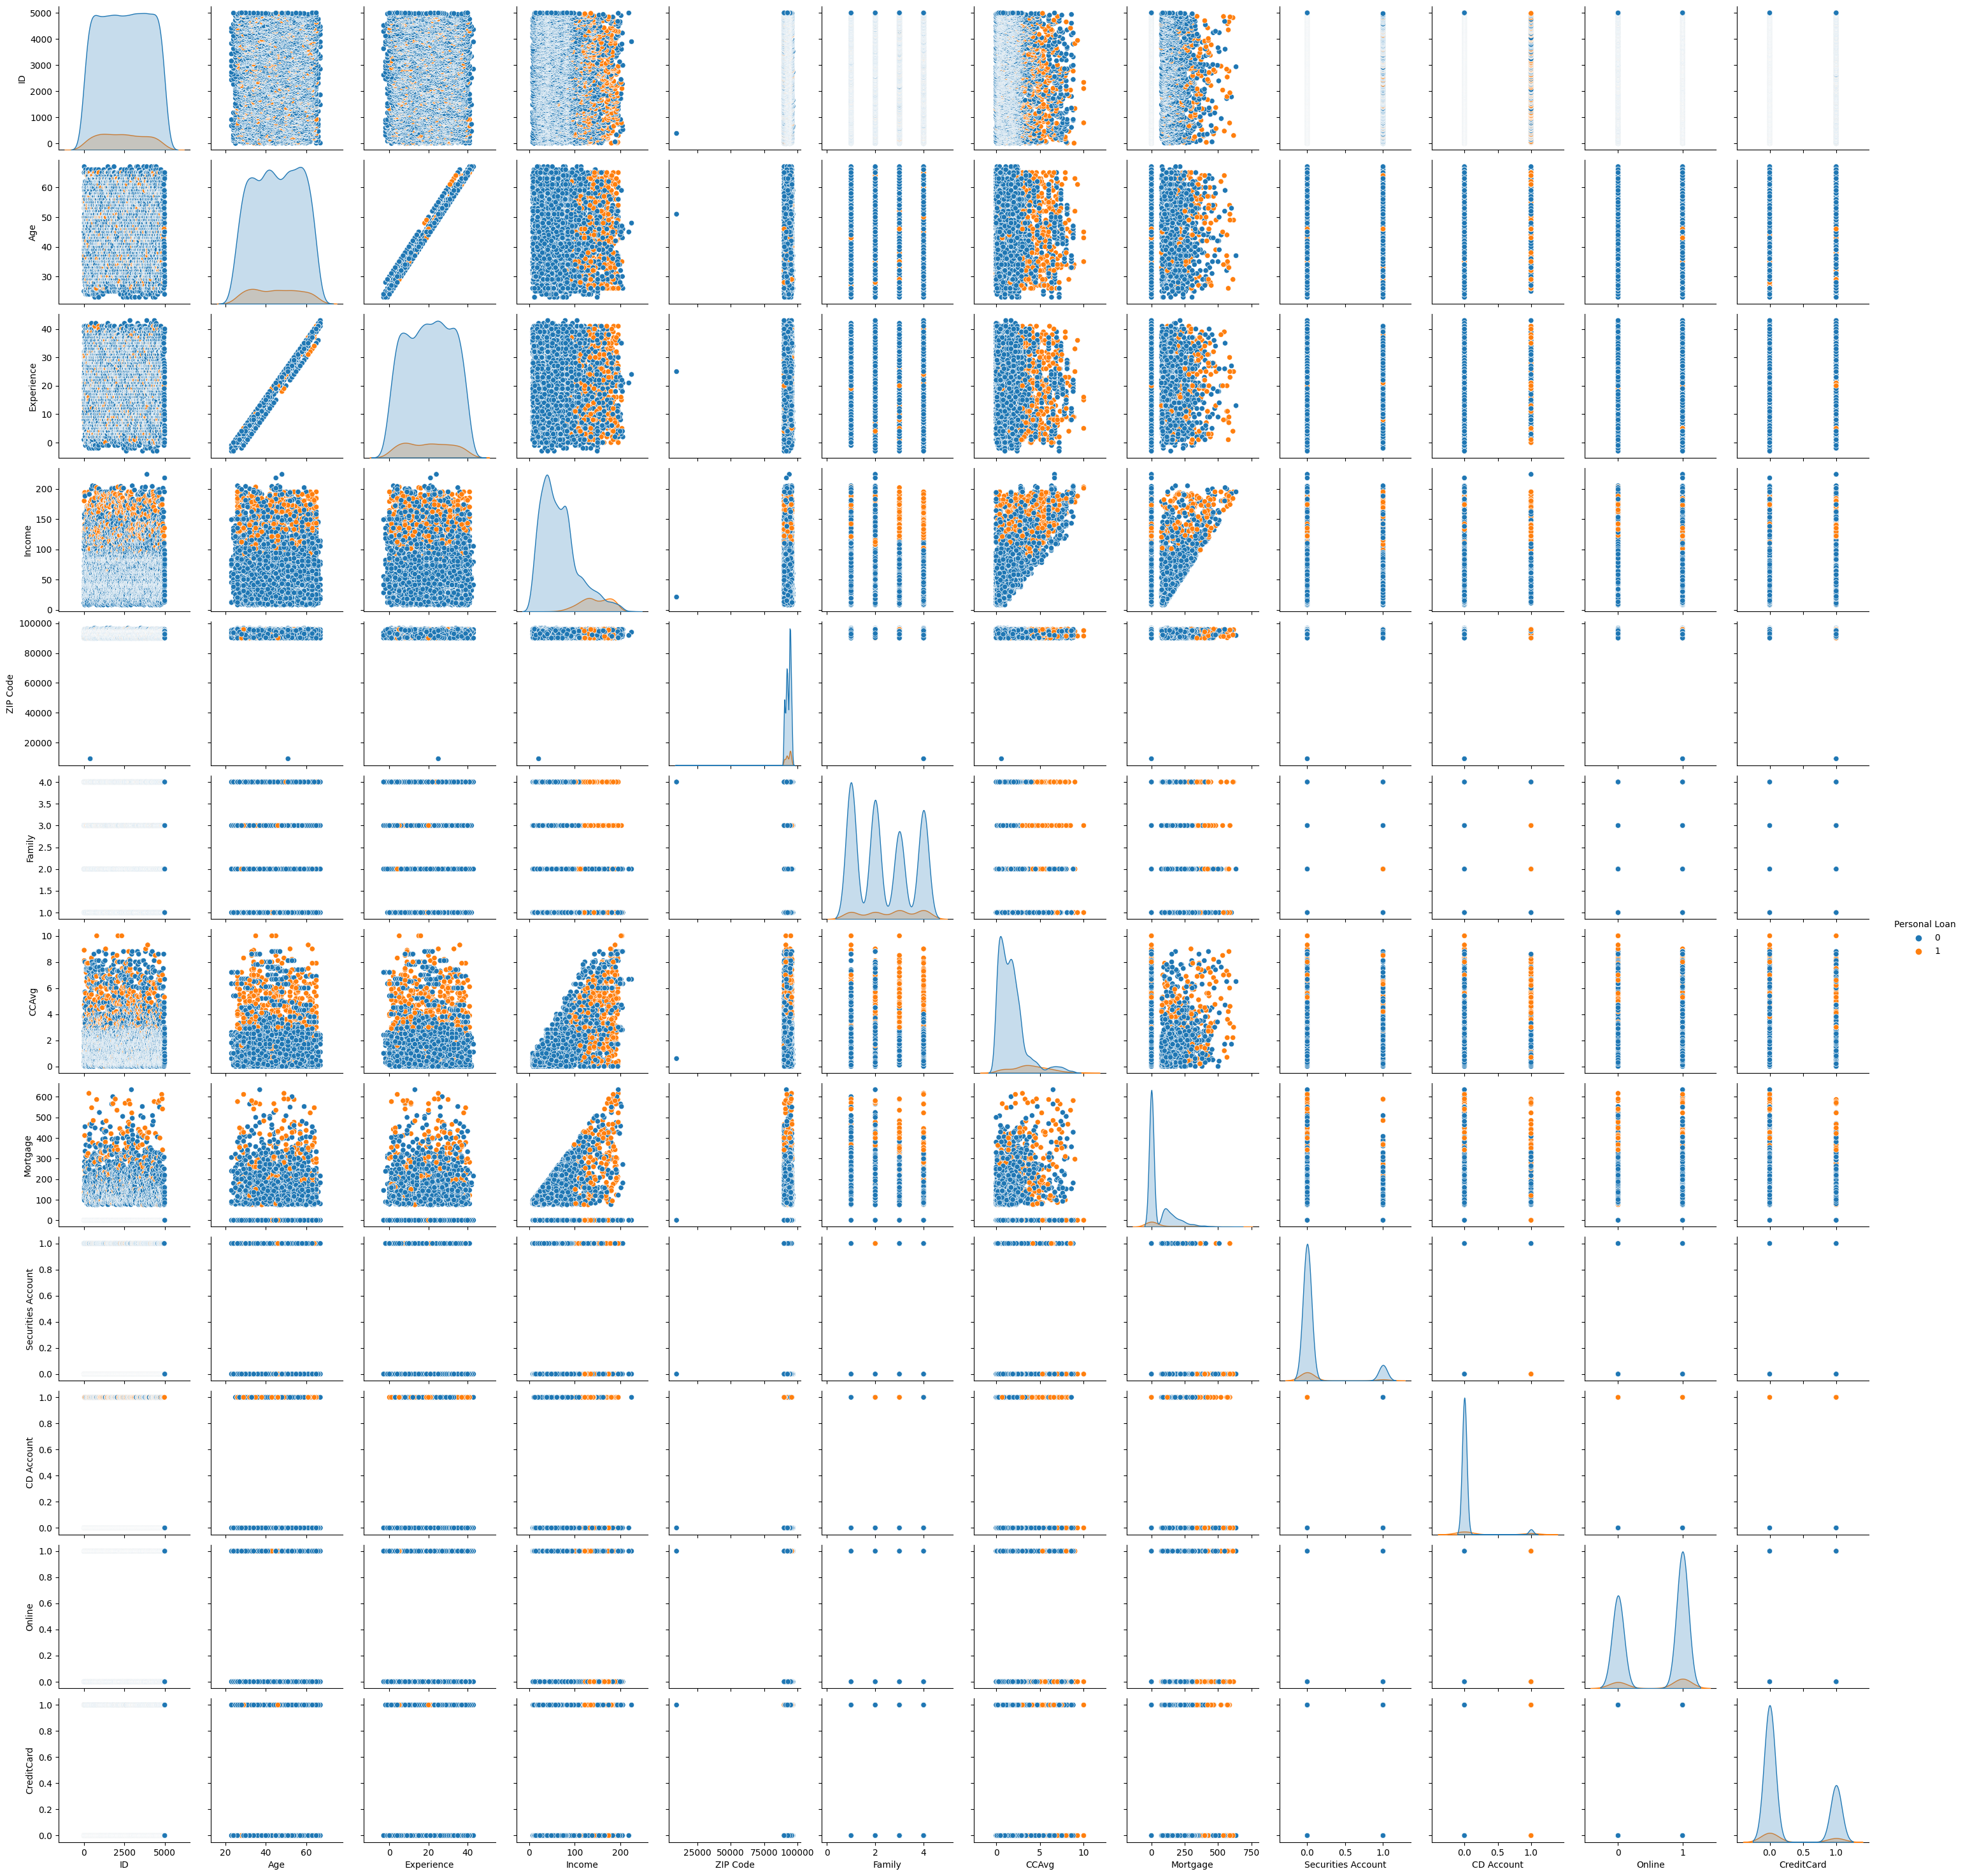

In [ ]:
sns.pairplot(df, hue = 'Personal Loan')

5. Split the data 70/30 into training and test datasets.
6. Develop an ANN model (MLPClassifier) with a single hidden layer with 20 nodes.
7. Assess model performance, provide the confusion matrix, classification report and ROC AUC values.

10 pts.

In [ ]:
# Split the data 70/30 into training and test datasets
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [ ]:
# Develop an ANN model with a single hidden layer with 20 nodes
model = MLPClassifier(hidden_layer_sizes=(20,), max_iter=1000)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20,), max_iter=1000)

In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0
CreditCard,5000.0,0.294000,0.455637,0.0,0.0,0.0,1.0,1.0


In [ ]:
# Assess model performance
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

[[1339   12]
 [  33  116]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1351
           1       0.91      0.78      0.84       149

    accuracy                           0.97      1500
   macro avg       0.94      0.88      0.91      1500
weighted avg       0.97      0.97      0.97      1500

0.8848205902662208


8. Assess the effect of the number of hidden nodes (5-30) on model accuracy.
9. Identify optimal number of nodes.

5 pts.

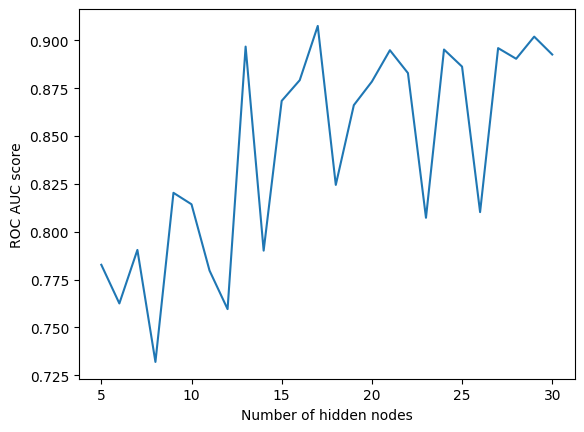

In [ ]:
# Assess the effect of the number of hidden nodes (5-30) on model accuracy
results = []
for i in range(5, 31):
    model = MLPClassifier(hidden_layer_sizes=(i,), max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append(roc_auc_score(y_test, y_pred))
plt.plot(range(5, 31), results)
plt.xlabel('Number of hidden nodes')
plt.ylabel('ROC AUC score')
plt.show()

In [ ]:
# Identify an optimal number of nodes
optimal_nodes = np.argmax(results) + 5
print('Optimal number of nodes:', optimal_nodes)

Optimal number of nodes: 17
